<a href="https://colab.research.google.com/github/henokzion/workout_performance_tracker/blob/main/workout_perfomance_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup credentials for readding data from google sheets

In [1]:
!pip install --upgrade gspread

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

Import modules for data processing

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Read data : Currenlty my workout split is, a mix between push/pull/logs and upper/lower


In [3]:
spreadsheet_name = 'Workout LPPLU'
leg_day = 'Legs'
push_day = 'Push'
pull_day = 'Pull'
lower_body_day = 'Lower body'
upper_body_day = 'Upper body'

spreadsheet = gc.open(spreadsheet_name)

def read_worksheet(worksheet_name):
  try:
    worksheet = gc.open(spreadsheet_name).worksheet(worksheet_name)
    # get_all_values gives a list of rows.
    rows = worksheet.get_all_values()
    return pd.DataFrame.from_records(rows)
  except gspread.SpreadsheetNotFound:
    print(f"Spreadsheet '{spreadsheet_name}' not found.")
    return None
  except gspread.WorksheetNotFound:
    print(f"Worksheet '{worksheet_name}' not found in spreadsheet '{spreadsheet_name}'.")
    return None
  except Exception as e:
    print(f"An error occurred: {e}")

leg_day_df = read_worksheet(leg_day)
push_day_df = read_worksheet(push_day)
pull_day_df = read_worksheet(pull_day)
lower_body_day_df = read_worksheet(lower_body_day)
upper_body_day_df = read_worksheet(upper_body_day)


# Leg day

In [4]:
leg_day_df.columns = leg_day_df.iloc[0]
leg_day_df.drop([0,1,2], inplace=True)

In [5]:
leg_day_df.drop(columns=['Exercise'], inplace=True)
leg_day_df.reset_index(drop=True, inplace=True)

Find 1 rep max for easy data manipulation

In [6]:
# Function to calculate 1RM using Epley formula
def calculate_1rm(data):
  data = data.strip().split(",")
  if len(data) == 2:
    weight, reps = data
    return round(float(weight) * (1 + float(reps) / 30), 2) # 1RM formula
  else:
    return None


leg_day_1_rep_max = leg_day_df.applymap(calculate_1rm)

leg_day_1_rep_max.ffill(inplace=True)
leg_day_1_rep_max.bfill(inplace=True)

leg_day_1_rep_max.head()

<ipython-input-6-0be1b9be36e5>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  leg_day_1_rep_max = leg_day_df.applymap(calculate_1rm)


,Lying Leg curl,Smith Squats,RDL Barbel,Leg Extension,Hamstring Extention,Leg Press,Calf on Leg Press
0,39.20,111.00,88.83,84.00,0.00,24.00,162.0
1,39.20,110.83,91.00,86.10,0.00,24.00,162.0
2,39.20,90.00,95.67,102.67,0.00,98.67,162.0
3,44.33,93.33,95.67,106.40,13.33,120.00,162.0
4,44.33,99.17,95.67,109.20,13.67,123.00,162.0


Plot

<Axes: >

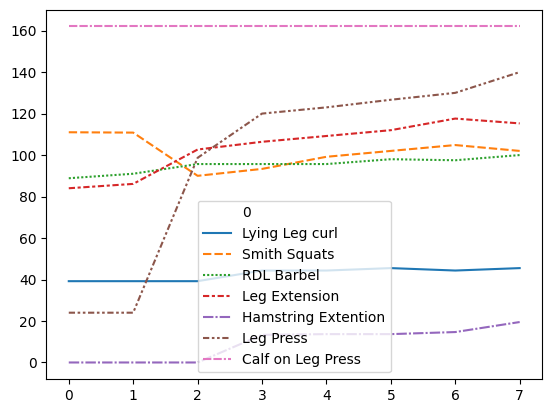

In [7]:
sns.lineplot(data=leg_day_1_rep_max)